In [15]:
# Importing Important Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# Extracting the data
boston = load_boston()

In [17]:
# Printing the keys
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [18]:
# Creating a dataframe
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [19]:
# Finding anomalies in LSTAT column

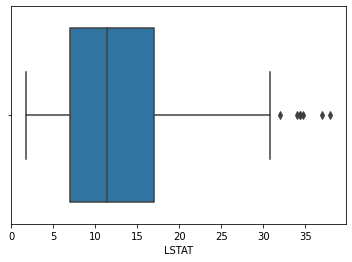

In [20]:
# Finding boxplot for LSTAT
sns.boxplot(df['LSTAT'])

In [21]:
# Making Isolation Forest Algorithm
model = IsolationForest(n_estimators = 100, contamination = float(0.1))
model.fit(df[['LSTAT']])
print(model.get_params())

{'behaviour': 'deprecated', 'bootstrap': False, 'contamination': 0.1, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [22]:
# Getting Scores
df['scores'] = model.decision_function(df[['LSTAT']])
df['anomaly_score'] = model.predict(df[['LSTAT']])
df[df['anomaly_score'] == 1].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,scores,anomaly_score
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,0.057149,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,0.090299,1
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,0.026159,1
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,0.066006,1
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,0.066136,1


In [28]:
df['anomaly_score'].value_counts()

 1    456
-1     50
Name: anomaly_score, dtype: int64

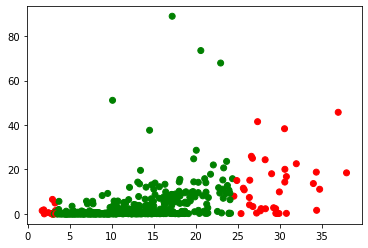

In [31]:
# Plot
colors = {1 : 'green', -1 : 'red'}
plt.scatter(df['LSTAT'], df['CRIM'], c = df['anomaly_score'].map(colors))
plt.show()